<a href="https://colab.research.google.com/github/pifeldma/MAT421/blob/main/ModuleH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ODE Initial Value Problem Statement

Reduction of Order

The Euler Method

<ipython-input-1-3a9f5424d51c>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


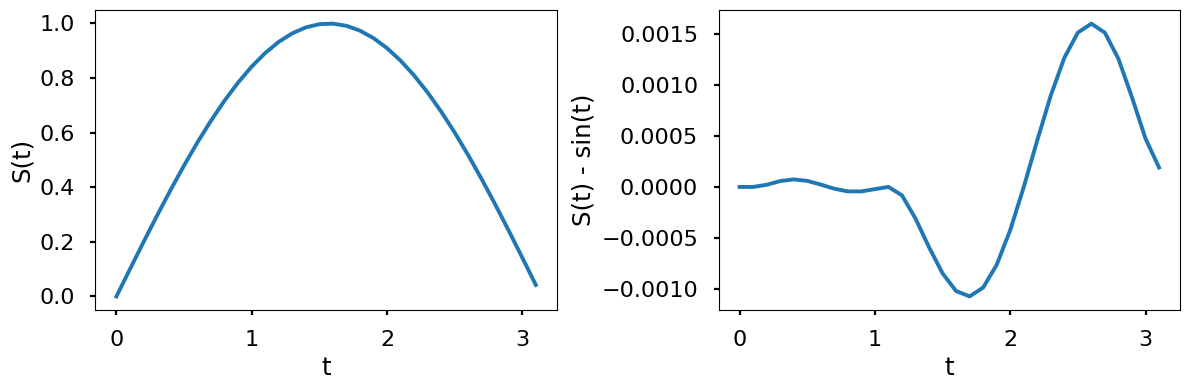

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

plt.style.use('seaborn-poster')

%matplotlib inline

F = lambda t, s: np.cos(t)

t_eval = np.arange(0, np.pi, 0.1)
solution = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(solution.t, solution.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(solution.t, solution.y[0] - np.sin(solution.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

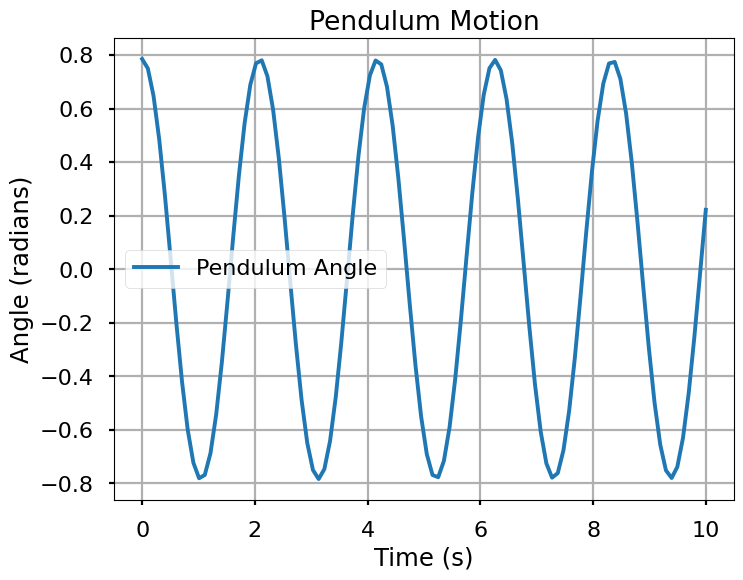

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


def pendulum(t, y):
    theta, theta_dot = y
    g = 9.8
    l = 1.0


    theta_double_dot = -g / l * np.sin(theta)

    return [theta_dot, theta_double_dot]


initial_conditions = [np.pi / 4, 0.0]

t_span = (0, 10)


solution = solve_ivp(pendulum, t_span, initial_conditions, t_eval=np.linspace(0, 10, 100))


theta_values = solution.y[0]

plt.figure(figsize=(8, 6))
plt.plot(solution.t, theta_values, label="Pendulum Angle")
plt.xlabel("Time (s)")
plt.ylabel("Angle (radians)")
plt.title("Pendulum Motion")
plt.grid(True)
plt.legend()
plt.show()


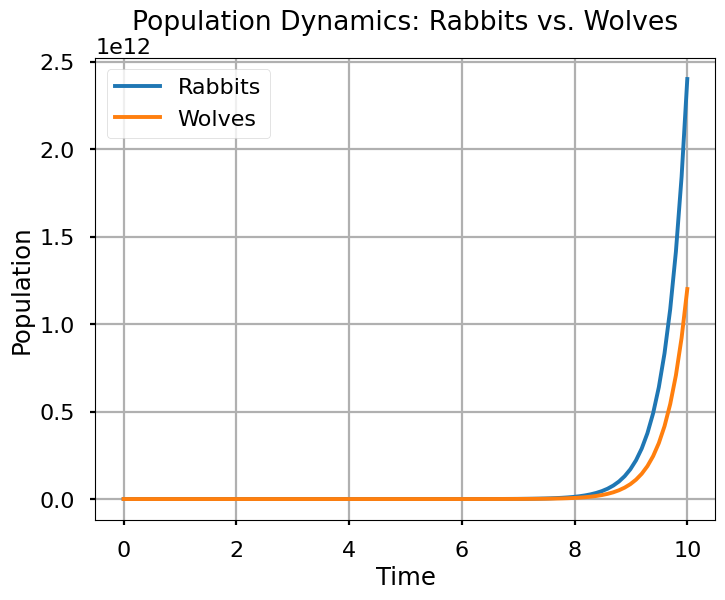

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def F(t, S):
    r, w = S
    dr_dt = 4 * r - 2 * w
    dw_dt = r + w
    return np.array([dr_dt, dw_dt])

r0 = 10
w0 = 5
S0 = np.array([r0, w0])

t_span = np.linspace(0, 10, 100)

def euler_method(F, S0, t_span):
    S = [S0]
    for t in t_span[1:]:
        S_next = S[-1] + F(t, S[-1]) * (t_span[1] - t_span[0])
        S.append(S_next)
    return np.array(S)

S_solution = euler_method(F, S0, t_span)


plt.figure(figsize=(8, 6))
plt.plot(t_span, S_solution[:, 0], label='Rabbits')
plt.plot(t_span, S_solution[:, 1], label='Wolves')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Population Dynamics: Rabbits vs. Wolves')
plt.legend()
plt.grid(True)
plt.show()